# Airbnb Boston Analysis

## Business Understanding


Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.

Here, we will analyse an open Boston airbnb data and try to answer the following questions:

- Which neighbourhoods are the most expensives?

- How is the distribution of rental properties in the neighbourhoods?

- Which numeric columns have a strong correlation with price?



## Data understanding

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
list_df = pd.read_csv("../boston-airbnb-analysis/inputs/listings.csv")

In [3]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
print(list_df.shape)

(3585, 95)


In [5]:
null_col = list_df.isnull().sum()[list_df.isnull().sum() > 0].sort_values(ascending=False) / list_df.shape[0]
null_col.head(10)

jurisdiction_names              1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
has_availability                1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
notes                           0.550907
interaction                     0.433473
dtype: float64

In [6]:
null_rows = list_df.isnull().sum(axis=1)[list_df.isnull().sum(axis=1) > 0].sort_values(ascending=False) / list_df.shape[1]
null_rows.head(20)

3300    0.368421
1836    0.357895
1923    0.357895
3223    0.347368
1310    0.336842
1837    0.336842
1049    0.336842
3282    0.336842
2057    0.336842
2211    0.336842
2266    0.336842
2207    0.336842
3294    0.326316
3057    0.326316
2203    0.326316
1518    0.326316
2545    0.326316
1406    0.326316
1743    0.326316
1817    0.326316
dtype: float64

In [7]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

## Data Preparation

In [8]:
# Dropping columns with more than 50% null values.
list_df = list_df.drop(null_col.index[:9], axis=1)
print(list_df.shape)

(3585, 86)


In [9]:
# Dropping some columns that are not usefull for my analysis
col_drop =[]
for col in list_df.columns:
    if col[-3:] == "url" or col[-2:] == 'id':
        col_drop.append(col)
col_drop.append('country')

text_col = ['last_scraped', 'name', 'summary', 'space', 'description','experiences_offered',
            'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_name']

col_drop = col_drop + text_col

df = list_df.drop(col_drop, axis=1)

In [10]:
def handling_rates(col):
    values = []
    for i in col:
        try:
            values.append(int(i[:-1]) / 100)
        except:
            values.append(i)
    return values

for col in df.columns:
    if 'rate' in col:
        df[col] = handling_rates(df[col])   


In [11]:
# Ajusting price column to float
df['price'] = df.price.apply(lambda p: float(p[1:].replace(',', '')))

In [12]:
def cleaning_fees(col):
    fees = []
    for i in col:
        try:
            fees.append(float(i[1:]))
        except:
            fees.append(i)
    return fees

for col in ['cleaning_fee', 'extra_people']:
    df[col] = cleaning_fees(df[col])
    df[col].fillna(0, inplace = True)

In [13]:
print(df.shape)
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

(3585, 62)


host_about                     1309
review_scores_accuracy          823
review_scores_location          822
review_scores_value             821
review_scores_checkin           820
review_scores_cleanliness       818
review_scores_communication     818
review_scores_rating            813
last_review                     756
first_review                    756
reviews_per_month               756
neighbourhood                   543
host_acceptance_rate            471
host_response_rate              471
host_response_time              471
host_neighbourhood              339
zipcode                          38
bathrooms                        14
market                           14
host_location                    11
bedrooms                         10
beds                              9
property_type                     3
city                              2
dtype: int64

In [14]:
lista = []
for i in df.city.str.split(','):
    try:
        lista.append(" ".join(i[0].title().split()))
    except:
        lista.append(i)

lista1 = []
for i in lista:
    try:
        x = i.split(" (")
        lista1.append(x[0])
    except:
        lista1.append(i)

In [15]:
df['city'] = lista1
df['city'] = df['city'].replace('波士顿', 'Boston')

In [16]:
df['street'] = df['street'].str.split(",").apply(lambda i: i[0])

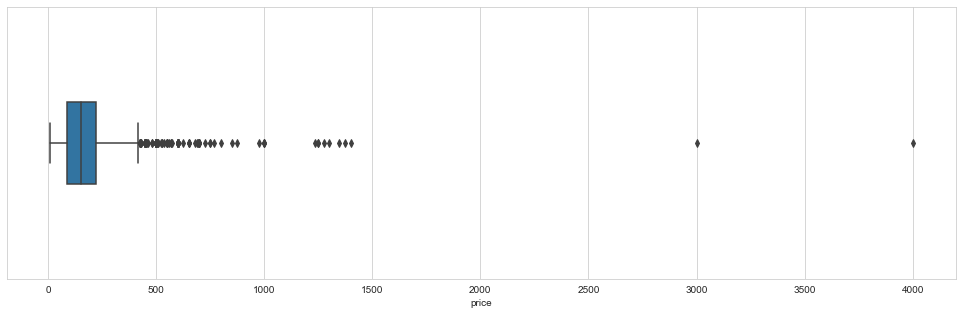

In [17]:
# Looking the prices distribution
plt.figure(figsize=(17,5))
sns.set_style("whitegrid")
sns.boxplot(data=df, x='price', width=0.3);

In [18]:
# Excluding price outliers from the analysis
df = df[df['price'] < 1500]

### Which neighbourhoods are the most expensive?

In [72]:
df.groupby(by='neighbourhood_cleansed').median()['price'].sort_values()

neighbourhood_cleansed
Hyde Park                   58.0
Mattapan                    67.0
Dorchester                  72.0
Roslindale                  76.5
Longwood Medical Area       84.0
Allston                     85.0
West Roxbury                85.0
Mission Hill                89.5
Brighton                    90.0
East Boston                 99.0
Roxbury                     99.0
Jamaica Plain              100.0
South Boston               150.0
North End                  179.0
South End                  180.0
Charlestown                180.0
Fenway                     190.0
Beacon Hill                195.0
West End                   199.0
Bay Village                206.5
Back Bay                   209.0
Chinatown                  219.0
Downtown                   225.0
South Boston Waterfront    237.0
Leather District           245.0
Name: price, dtype: float64

In [73]:
# Controls medians for price for the two neighbourhoods with highest median price

median_leather = df[df['neighbourhood_cleansed'] == 'Leather District']['price'].median()

median_sbw = df[df['neighbourhood_cleansed'] == 'South Boston Waterfront']['price'].median()

median_leather, median_sbw

(245.0, 237.0)

In [74]:
obs_diff = median_leather - median_sbw
obs_diff

8.0

In [75]:
diffs = []

for _ in range(10000):
    bootsamp = df.sample(df.shape[0], replace=True)
    median_sbw = bootsamp[bootsamp['neighbourhood_cleansed'] == 'South Boston Waterfront']['price'].median()
    median_leather = bootsamp[bootsamp['neighbourhood_cleansed'] == 'Leather District']['price'].median()
    diffs.append(median_leather - median_sbw)

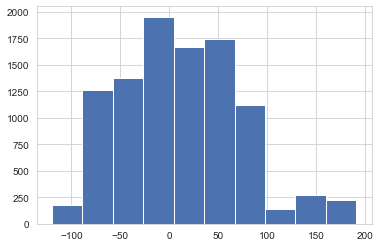

In [76]:
diffs = np.array(diffs)

plt.figure(figsize=(6,4))
plt.hist(diffs);

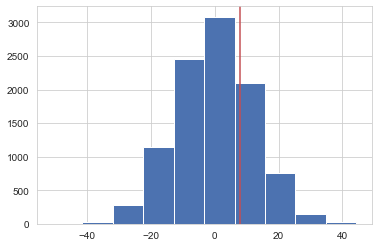

In [77]:
null_vals = np.random.normal(0, scale=np.nanmedian(diffs), size=diffs.size)

plt.figure(figsize=(6,4))
plt.hist(null_vals)
plt.axvline(obs_diff, c='r')

In [78]:
(null_vals > obs_diff).mean()

0.2466

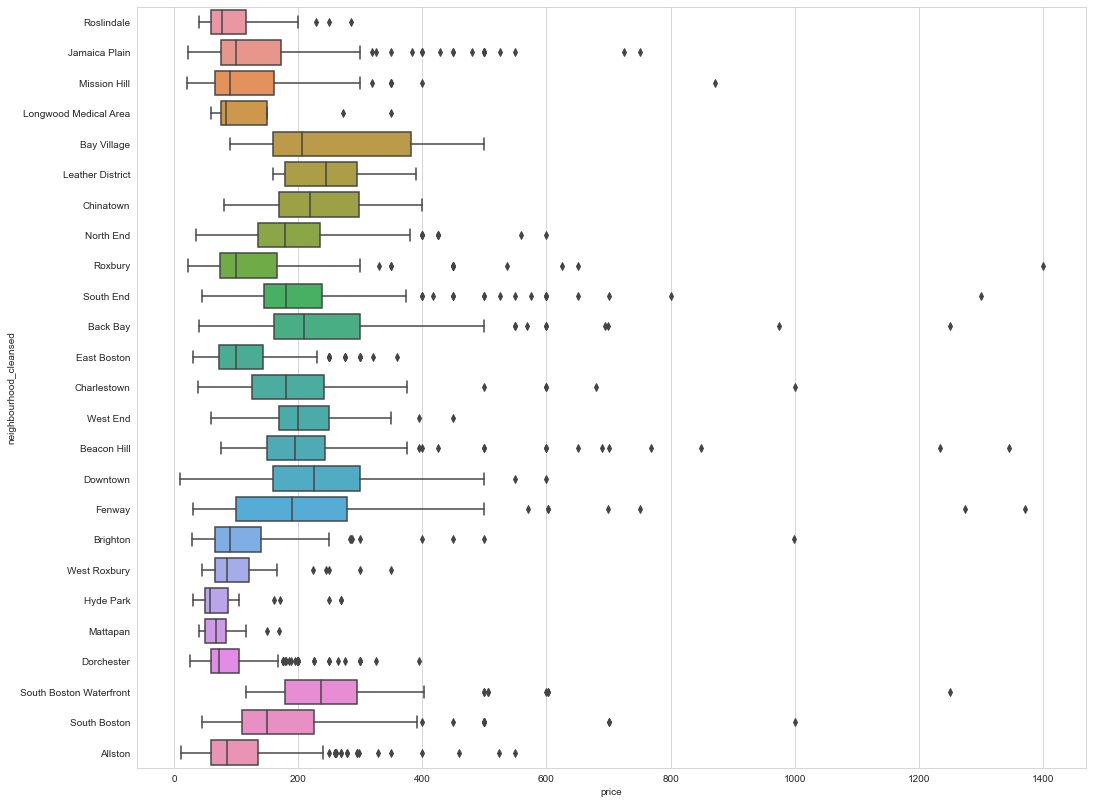

In [40]:
sns.set({"figure.figsize" : (17,14)})
sns.set_style("whitegrid")
sns.boxplot(data=df, x='price', y='neighbourhood_cleansed');

Resposta : 


### How is the distribution of retal properties per neighbourhood?

Text(0.5, 1.0, 'Rental Properties per Neighbourhood')

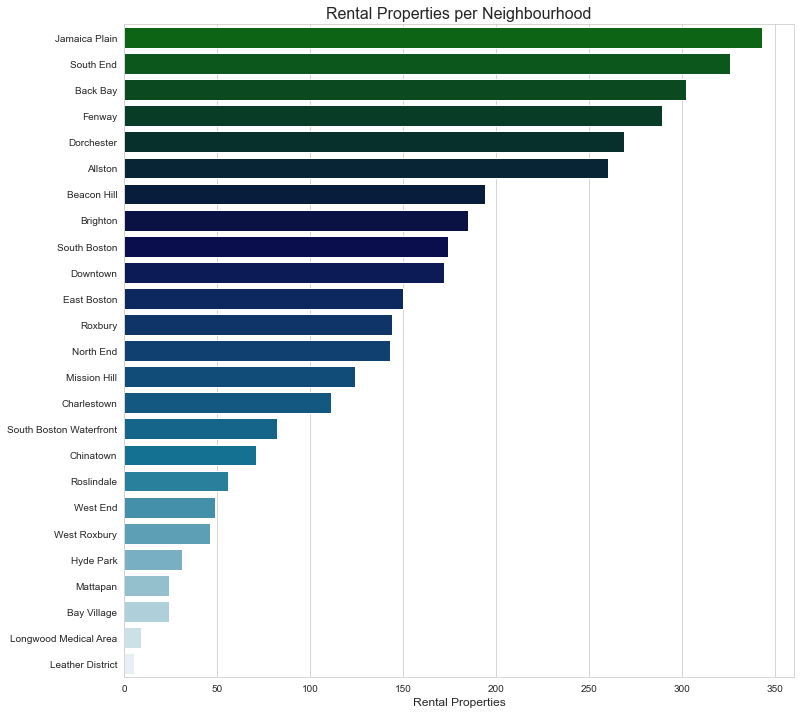

In [20]:
n_rental_hood = df['neighbourhood_cleansed'].value_counts()

sns.set({'figure.figsize' : (12,12)})
sns.set_style("whitegrid")

ax = sns.barplot(x=n_rental_hood, y=n_rental_hood.index, palette='ocean')
ax.set_xlabel("Rental Properties", fontdict={'fontsize' : 12})
ax.set_ylabel("")
ax.set_title("Rental Properties per Neighbourhood", fontdict={'fontsize' : 16})

**Findings**: Looking to the distribution of rental properties in the neighbourhoods, it's possible to observe that approximately 35% of the neighbourhoods have over 80% of all rental properties in Boston Airbnb data. 

Allston-Brighton, Jamaica Plain, South End, Back Bay and Fenway/Kenmore are the top five when it comes to rental properties offered. They holds almost 50% of the total properties registered in the Boston Airbnb data.

### Which numeric columns have a strong correlation with price?

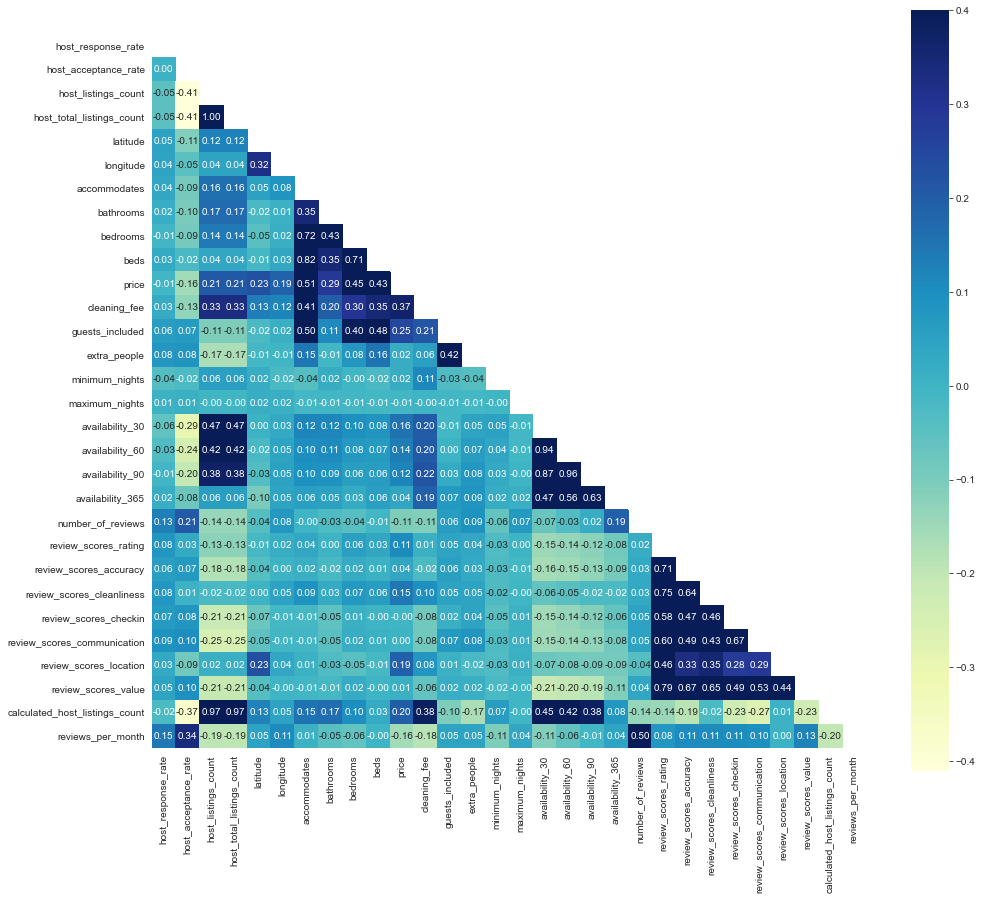

In [21]:
df_num = df.select_dtypes(['int64', 'float64'])
corr=df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask, vmax=.4, square=True, annot=True, fmt='.2f',cmap='YlGnBu')

**Findings**: Looking for the numeric columns, it's possible to observe that the columns with the strongest correlation with price are:

* accomodates;
* bedrooms;
* beds;
* cleaning_fee;
* bathrooms;
* guests_included.

Other relevant findings: 

* ``host_total_listings_count`` and ``host_listings_count`` have 1 of correlation. It's possible to drop one of these columns if the goal is make a prediction model. Something similar happens with availability columns.
